In [1]:
import requests
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xml = """<search-request>
    <impulse-class>L</impulse-class>
    <max-results>200</max-results>
</search-request>"""

In [3]:
xml

'<search-request>\n    <impulse-class>L</impulse-class>\n    <max-results>200</max-results>\n</search-request>'

In [4]:
url = 'http://www.thrustcurve.org/servlets/search'

In [5]:
response = requests.post(url, data=xml)

In [6]:
print(response.text)

<?xml version="1.0" encoding="ISO-8859-1"?>
<search-response xmlns="http://www.thrustcurve.org/2015/SearchResponse" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.thrustcurve.org/2015/SearchResponse http://www.thrustcurve.org/2015/search-response.xsd">
<criteria>
<criterion>
<name>impulse-class</name>
<value>L</value>
<matches>112</matches>
</criterion>
<matches>112</matches>
</criteria>
<results>
<result>
<motor-id>361</motor-id>
<manufacturer>Hypertek</manufacturer>
<manufacturer-abbrev>Hypertek</manufacturer-abbrev>
<designation>1685CC098L - L200</designation>
<brand-name>1685CC098L - L200</brand-name>
<common-name>L200</common-name>
<impulse-class>L</impulse-class>
<diameter>75.0</diameter>
<length>1031.0</length>
<type>hybrid</type>
<cert-org>Tripoli Rocketry Association, Inc.</cert-org>
<avg-thrust-n>200.0</avg-thrust-n>
<tot-impulse-ns>2639.3</tot-impulse-ns>
<burn-time-s>13.1965</burn-time-s>
<data-files>3</data-files>
<info-url>http://www.

In [7]:
mydict = xmltodict.parse(response.text)

In [8]:
motors = mydict['search-response']['results']['result']

In [9]:
def get_motors_of_class(c):
    xml = f"""<search-request>
    <impulse-class>{c}</impulse-class>
    <max-results>200</max-results>
</search-request>"""
    
    url = 'http://www.thrustcurve.org/servlets/search'
    
    response = requests.post(url, data=xml)
    
    mydict = xmltodict.parse(response.text)
    
    num_of_matches = int(mydict['search-response']['criteria']['matches'])
    
    motors = mydict['search-response']['results']['result']
    
    if num_of_matches != len(motors):
        print(f'Class: {c}: {num_of_matches} but only {len(motors)} returned')
    else:
        print(f'Class: {c}: {num_of_matches} found!')
        
    return motors

In [10]:
df = pd.DataFrame()

In [11]:
classes = ['A','B','C','D','E','F','G','H','I',"J","K","L","M","N","O"]

for c in classes:
    motors = get_motors_of_class(c)
    for motor in motors:
        try:
            df = df.append(motor,ignore_index=True)
        except:
            pass

Class: A: 16 found!
Class: B: 8 found!
Class: C: 10 found!
Class: D: 16 found!
Class: E: 23 found!
Class: F: 56 found!
Class: G: 90 found!
Class: H: 108 found!
Class: I: 138 found!
Class: J: 172 found!
Class: K: 161 found!
Class: L: 112 found!
Class: M: 118 found!
Class: N: 33 found!
Class: O: 11 found!


In [12]:

len(df)

1072

In [13]:
df.columns

Index(['availability', 'avg-thrust-n', 'brand-name', 'burn-time-s', 'cert-org',
       'common-name', 'data-files', 'delays', 'designation', 'diameter',
       'impulse-class', 'info-url', 'length', 'manufacturer',
       'manufacturer-abbrev', 'max-thrust-n', 'motor-id', 'prop-info',
       'prop-weight-g', 'tot-impulse-ns', 'total-weight-g', 'type',
       'updated-on', 'case-info', 'sparky'],
      dtype='object')

In [14]:
df.head()

,availability,avg-thrust-n,brand-name,burn-time-s,cert-org,common-name,data-files,delays,designation,diameter,...,max-thrust-n,motor-id,prop-info,prop-weight-g,tot-impulse-ns,total-weight-g,type,updated-on,case-info,sparky
0,regular,0.284,Micro Maxx II,0.772,National Association of Rocketry,Micro Maxx,3,1,Micro Maxx II,6.0,...,2.108,1,black powder,0.5,0.218,1.0,SU,2019-04-16,NaN,NaN
1,OOP,0.163,Micro Maxx,0.827,National Association of Rocketry,Micro Maxx,2,1,Micro Maxx,6.0,...,1.898,2,black powder,0.4,0.135,1.07,SU,2019-04-16,NaN,NaN
2,OOP,2.48,1/4A2,0.23,National Association of Rocketry,1/4A2,2,"2,4",1/4A2,10.5,...,5.4,3,NaN,0.75,0.57,NaN,SU,2019-04-16,NaN,NaN
3,regular,2.36,1/4A3,0.25,National Association of Rocketry,1/4A3,2,3,1/4A3,13.0,...,4.95,4,black powder,0.83,0.59,NaN,SU,2019-04-16,NaN,NaN
4,OOP,1.94,1/2A2,0.63,National Association of Rocketry,1/2A2,2,"2,4,6",1/2A2,10.5,...,3.97,5,NaN,1.5,1.22,NaN,SU,2019-04-16,NaN,NaN


In [15]:
summary = df[['common-name','impulse-class', 'length', 'diameter', 'prop-weight-g', 'total-weight-g', 'max-thrust-n','avg-thrust-n', 'burn-time-s','tot-impulse-ns']]
cols = summary.columns
summary[cols] = summary[cols].apply(pd.to_numeric, errors='ignore')

/Users/Devansh/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [16]:
summary.head()

,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns
0,Micro Maxx,A,26.0,6.0,0.50,1.00,2.108,0.284,0.772,0.218
1,Micro Maxx,A,26.0,6.0,0.40,1.07,1.898,0.163,0.827,0.135
2,1/4A2,A,38.0,10.5,0.75,NaN,5.400,2.480,0.230,0.570
3,1/4A3,A,45.0,13.0,0.83,NaN,4.950,2.360,0.250,0.590
4,1/2A2,A,38.0,10.5,1.50,NaN,3.970,1.940,0.630,1.220


In [17]:
summary['prop_mass_fraction'] = summary['prop-weight-g']/(summary['prop-weight-g']+summary['total-weight-g'])

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124876710>]],
      dtype=object)

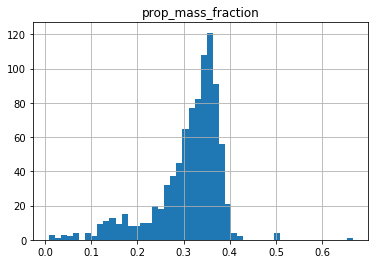

In [18]:
summary.hist(column='prop_mass_fraction',bins=50)

In [19]:
summary['prop_mass_fraction'].describe()

count    896.000000
mean       0.310873
std        0.074009
min        0.007842
25%        0.286435
50%        0.330961
75%        0.358947
max        0.666667
Name: prop_mass_fraction, dtype: float64

In [20]:
#therefore, propellant mass fraction of the motor is ~30%
prop_mass_fraction = summary['prop_mass_fraction'].median()
print(prop_mass_fraction)

0.3309608540925267


<Figure size 432x288 with 0 Axes>

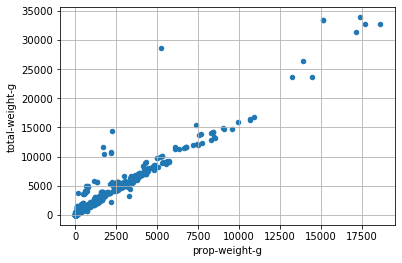

In [21]:
plots = ['prop-weight-g', 'total-weight-g','tot-impulse-ns','impulse-class']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(x=0,y=1)
plt.grid()


<Figure size 432x288 with 0 Axes>

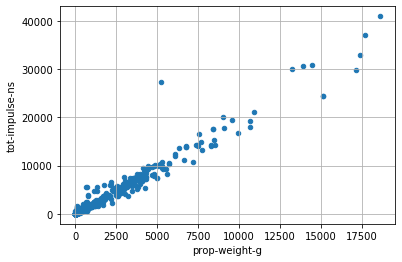

In [22]:
plots = ['prop-weight-g', 'total-weight-g','tot-impulse-ns','impulse-class']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(x=0,y=2)
plt.grid()

In [23]:
#very well correlated, as it should be. estimate the specific impulse from this data
summary['c-m/s'] = 1000*summary['tot-impulse-ns']/summary['prop-weight-g']

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
summary['c-m/s'].describe()

count      1057.000000
mean       2215.254905
std        5042.431803
min         238.461538
25%        1706.349206
50%        1878.565255
75%        2053.412463
max      155279.069767
Name: c-m/s, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112b8dcf8>]],
      dtype=object)

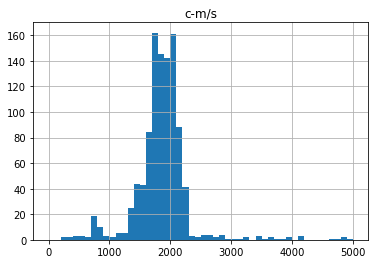

In [25]:
summary.hist(column='c-m/s', bins=50, range=(0,5000))

In [26]:
c = summary['c-m/s'].median()
print(f'Therefore, use exhaust velocity of {c} m/s')

Therefore, use exhaust velocity of 1878.5652549697495 m/s


<Figure size 432x288 with 0 Axes>

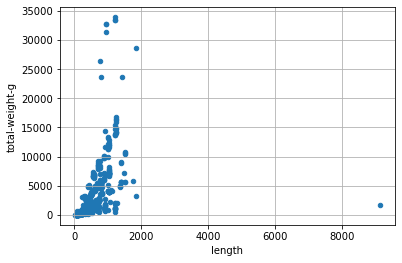

In [27]:
plots = ['length', 'total-weight-g']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(0,1)
plt.grid()

<Figure size 432x288 with 0 Axes>

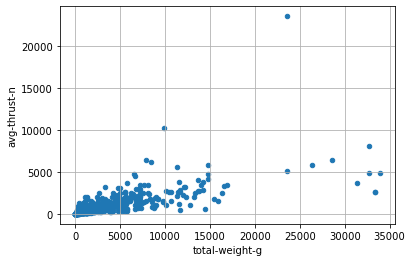

In [28]:
plots = [ 'total-weight-g', 'avg-thrust-n']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(0,1)
plt.grid()

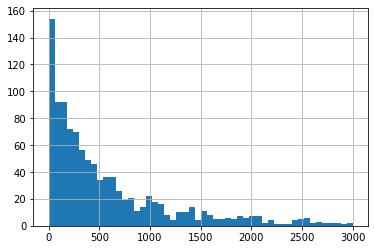

In [29]:
summary['avg-thrust-n'].hist(bins=50, range=(0,3000))

<Figure size 1080x1080 with 0 Axes>

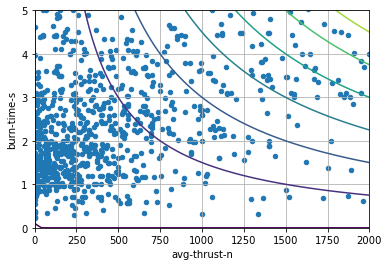

In [30]:
import numpy as np

plt.figure(figsize=(15,15))
summary.plot.scatter(x='avg-thrust-n',y='burn-time-s')

xrange = np.linspace(0,2000)
yrange = np.linspace(0,5)
xv, yv = np.meshgrid(xrange, yrange)

plt.contour(xv,yv,xv*yv)

plt.xlim(np.amin(xv),np.amax(xv))
plt.ylim(np.amin(yv),np.amax(yv))

plt.grid()

In [35]:
summary.head()

,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction,c-m/s
0,Micro Maxx,A,26.0,6.0,0.50,1.00,2.108,0.284,0.772,0.218,0.333333,436.000000
1,Micro Maxx,A,26.0,6.0,0.40,1.07,1.898,0.163,0.827,0.135,0.272109,337.500000
2,1/4A2,A,38.0,10.5,0.75,NaN,5.400,2.480,0.230,0.570,NaN,760.000000
3,1/4A3,A,45.0,13.0,0.83,NaN,4.950,2.360,0.250,0.590,NaN,710.843373
4,1/2A2,A,38.0,10.5,1.50,NaN,3.970,1.940,0.630,1.220,NaN,813.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c91dd68>]],
      dtype=object)

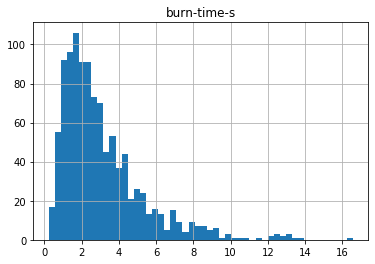

In [37]:
summary.hist(column='burn-time-s',bins=50)


/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


(0, 4000)

<Figure size 432x288 with 0 Axes>

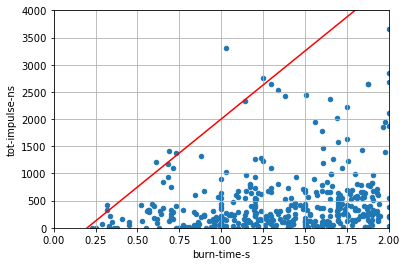

In [90]:
plots = ['tot-impulse-ns','burn-time-s']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(x=1,y=0)
bt = np.linspace(0,2)
plt.plot(bt,2500*(bt-0.2),'r')

plt.grid()
plt.xlim([0,2])
plt.ylim([0,4000])

(0, 2000)

<Figure size 432x288 with 0 Axes>

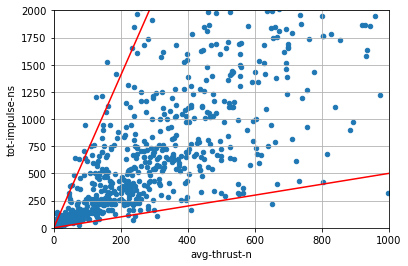

In [108]:
plots = ['tot-impulse-ns','avg-thrust-n']

cleaned = summary[plots].dropna()
plt.figure()

cleaned.plot.scatter(x=1,y=0)
t = np.linspace(0,1000)
plt.plot(t,7*t,'r')
plt.plot(t,0.5*t,'r')

plt.grid()
plt.xlim([0,1000])
plt.ylim([0,2000])

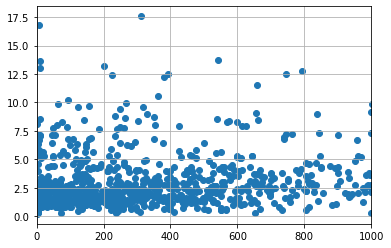

In [106]:
plt.scatter(summary['avg-thrust-n'],summary['tot-impulse-ns']/summary['avg-thrust-n'])
plt.xlim(0,1000)
plt.grid()

In [61]:
summary.head()

,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction,c-m/s
0,Micro Maxx,A,26.0,6.0,0.50,1.00,2.108,0.284,0.772,0.218,0.333333,436.000000
1,Micro Maxx,A,26.0,6.0,0.40,1.07,1.898,0.163,0.827,0.135,0.272109,337.500000
2,1/4A2,A,38.0,10.5,0.75,NaN,5.400,2.480,0.230,0.570,NaN,760.000000
3,1/4A3,A,45.0,13.0,0.83,NaN,4.950,2.360,0.250,0.590,NaN,710.843373
4,1/2A2,A,38.0,10.5,1.50,NaN,3.970,1.940,0.630,1.220,NaN,813.333333


In [109]:
target_T = 1300
target_burn_time = 0.5
summary['dist'] = ((summary['avg-thrust-n']-target_T)/(target_T))**2 + (summary['burn-time-s']-(target_burn_time)/target_burn_time)**2
summary.sort_values(by='dist').head()

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction,c-m/s,dist
696,K1499,K,260.0,75.0,604.0,1741.0,1720.12,1499.8,0.88,1321.7,0.257569,2188.245033,0.038021
603,J975,J,740.0,38.0,552.7,NaN,NaN,1018.5,1.03,1033.4,NaN,1869.730414,0.047789
630,J1026,J,625.5,38.0,616.0,1172.0,1212.00,1026.0,1.20,1267.0,0.344519,2056.818182,0.084424
792,K1127,K,625.5,38.0,624.0,1172.0,1428.00,1029.0,1.24,1285.0,0.347439,2059.294872,0.101056
605,J850,J,576.0,38.0,450.0,NaN,NaN,883.8,1.00,899.9,NaN,1999.777778,0.102498


In [114]:
summary.sort_values(by='burn-time-s')

,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction,c-m/s,dist
2,1/4A2,A,38.0,10.5,0.75,NaN,5.40,2.48,0.230000,0.57,NaN,760.000000,1.589088
3,1/4A3,A,45.0,13.0,0.83,NaN,4.95,2.36,0.250000,0.59,NaN,710.843373,1.558873
110,F240,F,133.0,24.0,30.30,91.80,285.90,236.20,0.290000,68.30,0.248157,2254.125413,1.173727
392,I1299,I,249.0,38.0,192.00,422.00,1851.42,1335.00,0.316000,422.95,0.312704,2202.864583,0.468581
260,H999,H,203.0,38.0,147.00,331.00,1710.00,999.00,0.320220,319.90,0.307531,2176.190476,0.515711
67,E75,E,69.0,24.0,104.00,52.00,99.90,74.30,0.330000,24.80,0.666667,238.461538,1.337859
6,1/2A6,A,70.0,18.0,2.60,NaN,7.86,3.42,0.330000,1.13,NaN,434.615385,1.443645
259,H669,H,152.0,38.0,98.00,252.00,961.50,651.40,0.339000,221.00,0.280000,2255.102041,0.685845
165,G339,G,97.0,38.0,49.00,181.00,503.51,307.53,0.350000,108.90,0.213043,2222.448980,1.005338
5,1/2A3,A,45.0,13.0,2.00,NaN,7.62,3.03,0.360000,1.09,NaN,545.000000,1.404944


In [113]:
(summary[summary['avg-thrust-n']>1250]).sort_values(by='tot-impulse-ns')

,common-name,impulse-class,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction,c-m/s,dist
392,I1299,I,249.0,38.0,192.0,422.0,1851.42,1335.00,0.316,422.95,0.312704,2202.864583,0.468581
543,J1299,J,231.0,54.0,371.6,834.0,1468.28,1291.58,0.653,843.40,0.308228,2269.644779,0.120451
574,J1365,J,326.0,54.0,444.0,1119.0,1568.20,1365.30,0.680,932.40,0.284069,2100.000000,0.104923
561,J1520,J,329.0,54.0,537.0,1026.0,1686.80,1519.80,0.710,1092.50,0.343570,2034.450652,0.112687
733,K1720,K,403.0,54.0,592.0,1351.0,2007.20,1722.30,0.680,1176.20,0.304683,1986.824324,0.207925
544,J1799,J,330.0,54.0,591.0,1111.0,2965.88,1963.39,0.610,1214.80,0.347239,2055.499154,0.412506
696,K1499,K,260.0,75.0,604.0,1741.0,1720.12,1499.80,0.880,1321.70,0.257569,2188.245033,0.038021
797,K2050,k,383.0,54.0,674.0,1292.0,2086.00,1874.00,0.730,1384.00,0.342828,2053.412463,0.267856
719,K2045,K,404.0,54.0,716.0,1290.0,2231.20,2045.00,0.690,1407.60,0.356929,1965.921788,0.424517
749,K1250,K,491.0,54.0,915.0,1815.0,1660.90,1251.90,1.560,1950.90,0.335165,2132.131148,0.314969


/Users/Devansh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/Devansh/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


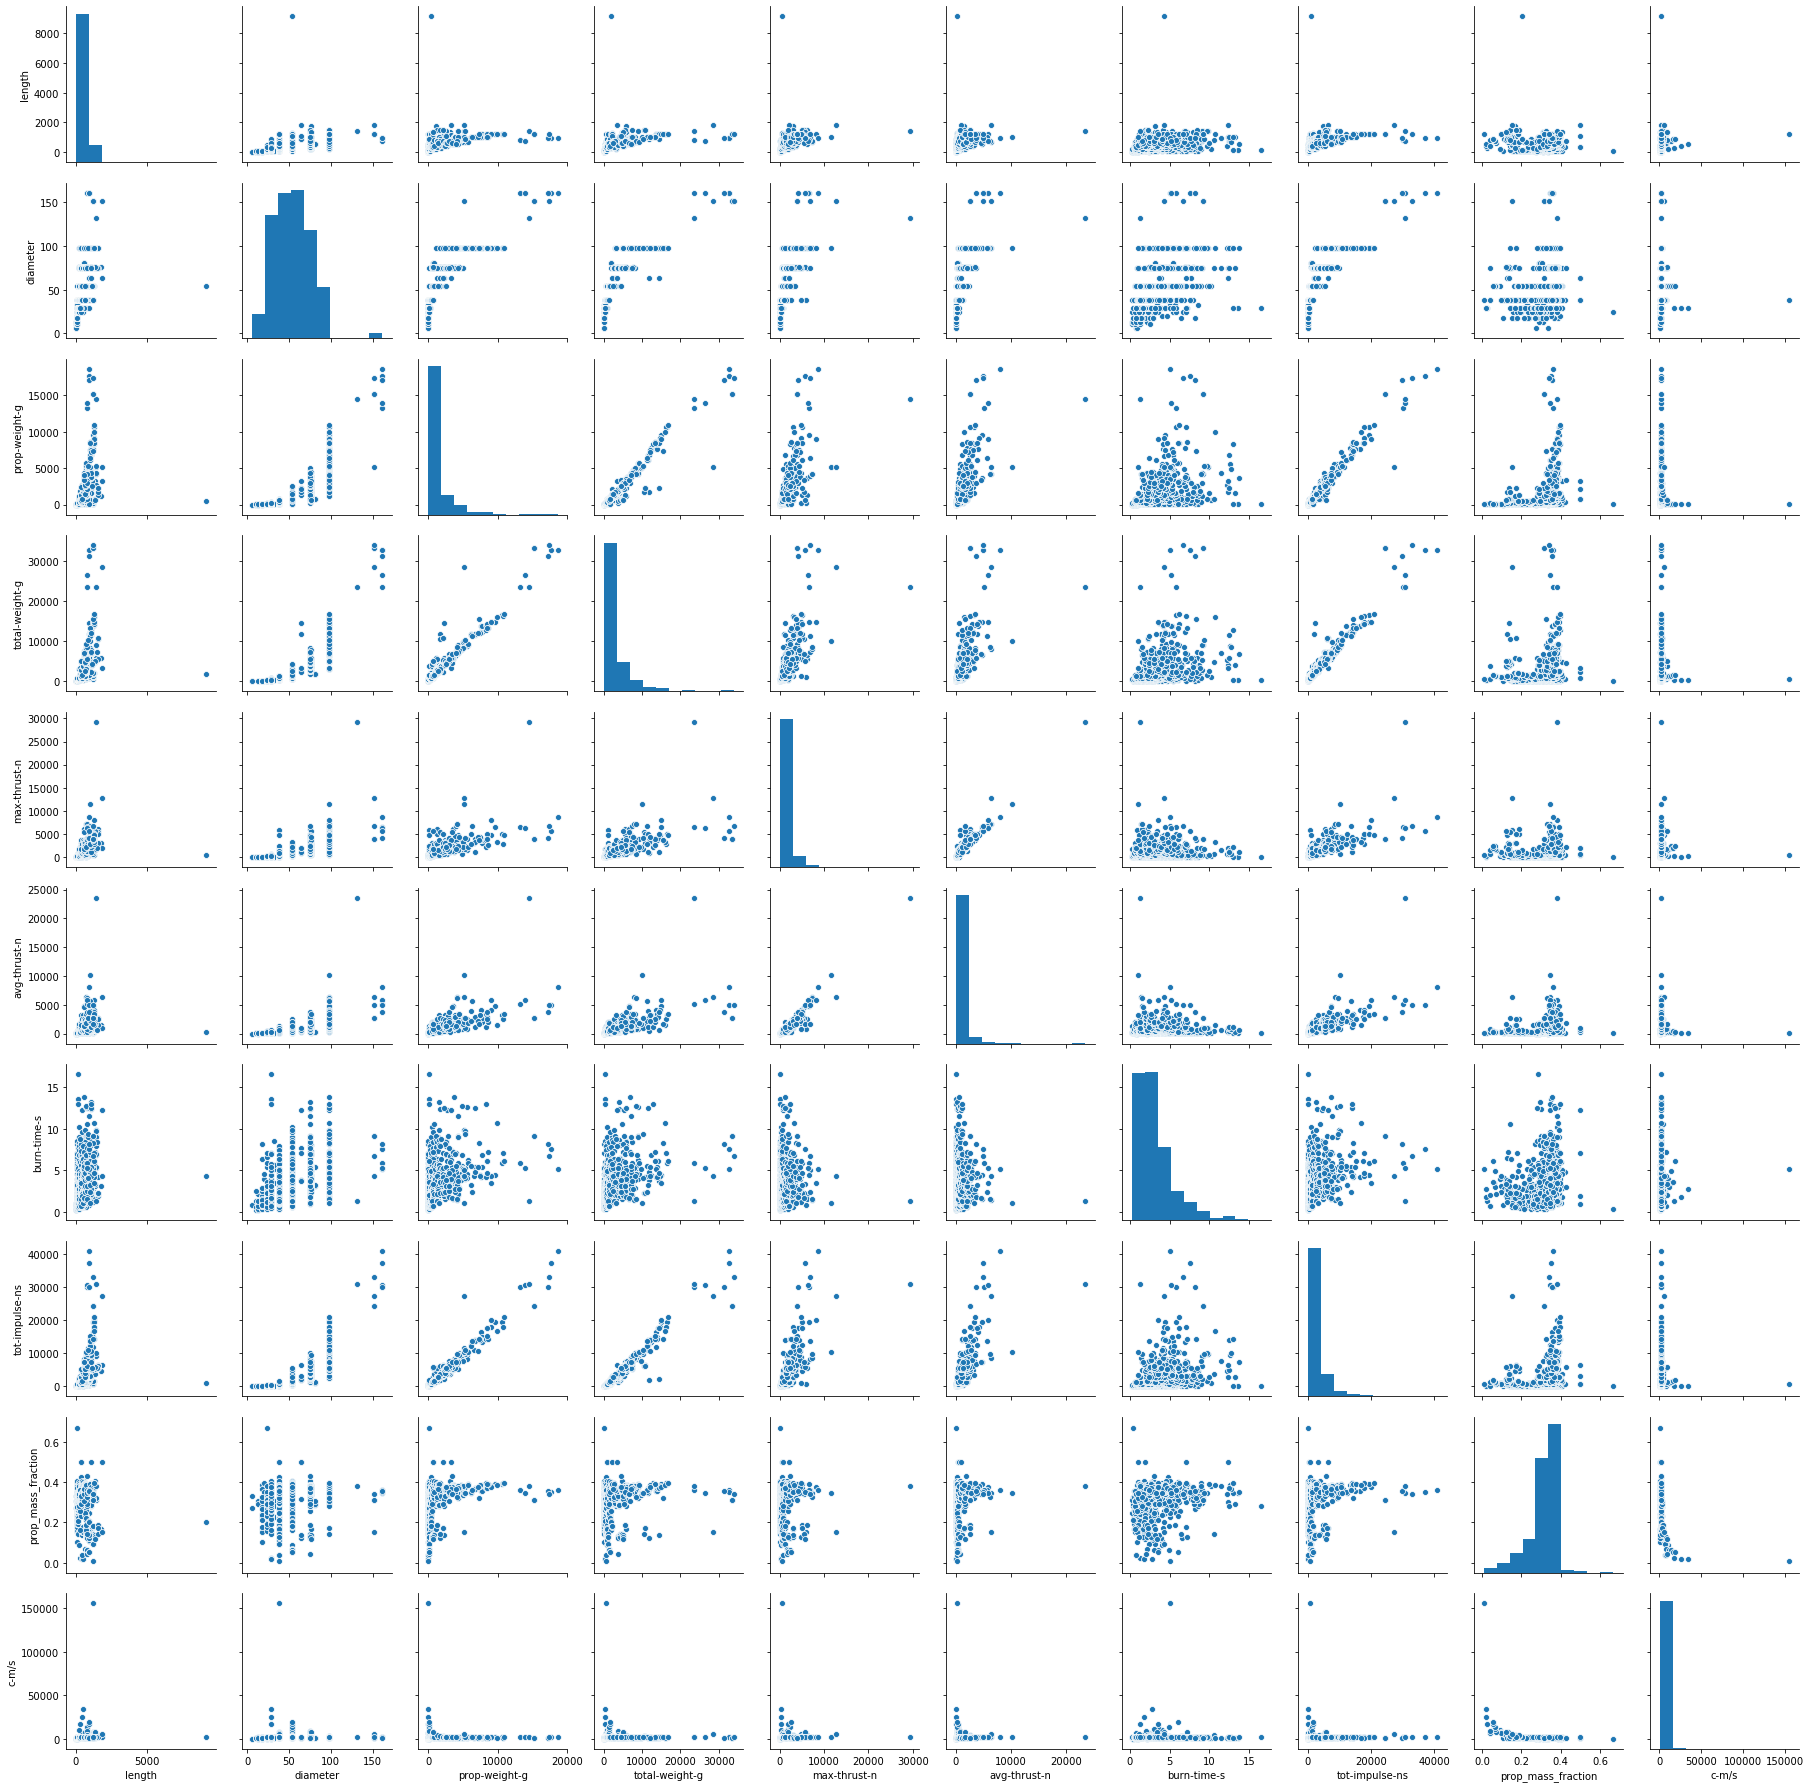

In [31]:
sns.pairplot(summary)

In [32]:
summary.corr()

,length,diameter,prop-weight-g,total-weight-g,max-thrust-n,avg-thrust-n,burn-time-s,tot-impulse-ns,prop_mass_fraction,c-m/s
length,1.000000,0.543901,0.470634,0.491556,0.483698,0.396100,0.359659,0.484206,-0.042019,0.099366
diameter,0.543901,1.000000,0.819113,0.852966,0.684974,0.654947,0.519038,0.824553,0.241034,-0.006478
prop-weight-g,0.470634,0.819113,1.000000,0.965012,0.708013,0.730804,0.440148,0.980520,0.312820,-0.032720
total-weight-g,0.491556,0.852966,0.965012,1.000000,0.724305,0.713749,0.429350,0.970939,0.187809,-0.018152
max-thrust-n,0.483698,0.684974,0.708013,0.724305,1.000000,0.957630,0.142801,0.765609,0.127559,0.017499
avg-thrust-n,0.396100,0.654947,0.730804,0.713749,0.957630,1.000000,0.094510,0.771497,0.219516,-0.010272
burn-time-s,0.359659,0.519038,0.440148,0.429350,0.142801,0.094510,1.000000,0.420283,0.183317,0.030048
tot-impulse-ns,0.484206,0.824553,0.980520,0.970939,0.765609,0.771497,0.420283,1.000000,0.255624,-0.011582
prop_mass_fraction,-0.042019,0.241034,0.312820,0.187809,0.127559,0.219516,0.183317,0.255624,1.000000,-0.308266
c-m/s,0.099366,-0.006478,-0.032720,-0.018152,0.017499,-0.010272,0.030048,-0.011582,-0.308266,1.000000


In [33]:

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(summary.select_dtypes(include='float64'), 10))

Top Absolute Correlations
prop-weight-g   tot-impulse-ns    0.980520
total-weight-g  tot-impulse-ns    0.970939
prop-weight-g   total-weight-g    0.965012
max-thrust-n    avg-thrust-n      0.957630
diameter        total-weight-g    0.852966
                tot-impulse-ns    0.824553
                prop-weight-g     0.819113
avg-thrust-n    tot-impulse-ns    0.771497
max-thrust-n    tot-impulse-ns    0.765609
prop-weight-g   avg-thrust-n      0.730804
dtype: float64
